<a href="https://colab.research.google.com/github/sanjid-007/ML-Lab-Final/blob/main/OLD_ASSIGNMENT/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Univariate Linear Regression**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
import seaborn as sns
# from google.colab import files
# uploaded = files.upload()
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ML-DATASET/2. Labs/1. Linear Regression/House_Rent_Dataset.csv')
data.head()

,size,price
0,2000,810
1,2100,907
2,1100,312
3,2200,950
4,1000,301


In [ ]:
data.shape

(7, 2)

In [ ]:
X = data['size'].values
Y = data['price'].values

In [ ]:
mean_X = np.mean(X)
mean_Y = np.mean(Y)

In [ ]:
A = 0
B = 0
for i in range(len(X)):
  A += (X[i] - mean_X) * (Y[i] - mean_Y)
  B += (X[i] - mean_X) ** 2

m = A / B
c = mean_Y - (m * mean_X)

print(m, c)

0.5425615384615384 -272.8092307692307


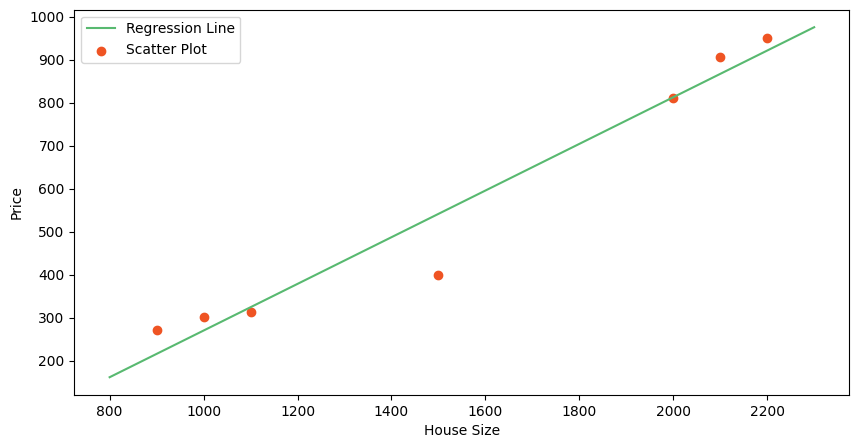

In [ ]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)

max_x = np.max(X) + 100
min_x = np.min(X) - 100

x = np.linspace(min_x, max_x, 1000)
y = m * x + c

plt.plot(x, y, color='#58b970', label='Regression Line')
plt.scatter(X, Y, c = "#ef5423", label = 'Scatter Plot')

plt.xlabel('House Size')
plt.ylabel('Price')
plt.legend()
plt.show()

### **Gradient Descent**


-272.8019845744321 0.5425615384615384


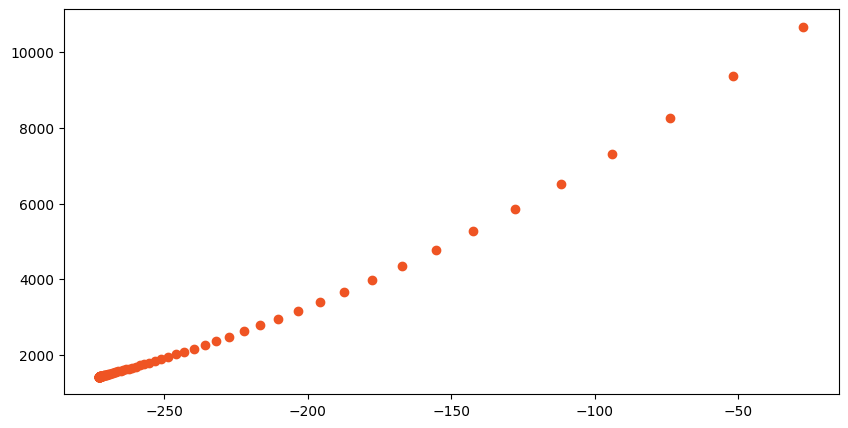

In [ ]:
thetas = []
costs = []

m = len(X)
epoch = 100
# learning_rate_1 = 0.0000001
learning_rate = 0.1
theta_0 = 0
theta_1 = 0.5425615384615384

for i in range(epoch):
  temp_0 = 0
  temp_1 = 0
  for j in range(m):
    temp_0 += (theta_0 + theta_1*X[j] - Y[j])
    # temp_1 += (theta_0 + theta_1*X[j] - Y[j]) * X[j]

  theta_0 = theta_0 - learning_rate * (temp_0) / m
  # theta_1 = theta_1 - learning_rate_1 * (temp_1) / m

  thetas.append(theta_0)
  sum = 0
  for k in range(m):
    sum_ = (theta_0 + theta_1*X[k] - Y[k]) * ((theta_0 + theta_1*X[k] - Y[k]))
  cost = sum_ / (2 * m)
  costs.append(cost)

  # print('Theta 0 : ' , theta_0)
  # print('Theta 1 : ' ,theta_1)

print(theta_0, theta_1)

plt.scatter(thetas, costs, c = "#ef5423", label = 'Scatter Plot')
plt.show()

### **Gradient Descent with 4k+ data**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ML-DATASET/2. Labs/1. Linear Regression/4K_House_Rent_Dataset.csv')
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [ ]:
data.shape

(4746, 12)

-0.3998334298732945 40.60576103910427


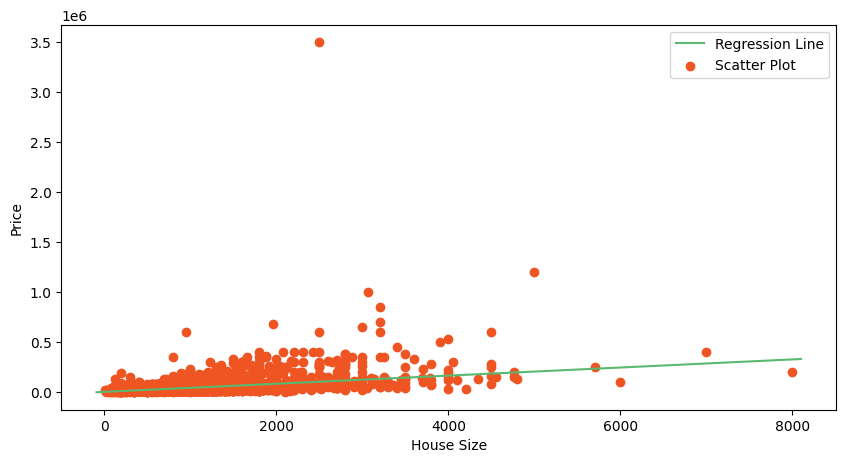

In [ ]:
X = data['Size']
Y = data['Rent']

m = len(X)
epoch = 1000
learning_rate = 0.0000001
theta_0 = 0
theta_1 = 0

for i in range(epoch):
  temp_0 = 0
  temp_1 = 0
  for j in range(m):
    temp_0 += (theta_0 + theta_1*X[j] - Y[j])
    temp_1 += (theta_0 + theta_1*X[j] - Y[j]) * X[j]

  theta_0 = theta_0 - learning_rate * (temp_0) / m
  theta_1 = theta_1 - learning_rate * (temp_1) / m

  sum = 0
  for k in range(m):
    sum_ = (theta_0 + theta_1*X[k] - Y[k]) * ((theta_0 + theta_1*X[k] - Y[k]))
  cost = sum_ / (2 * m)

  # print(theta_0, theta_1)


# Plotting Data
max_x = np.max(X) + 100
min_x = np.min(X) - 100

x = np.linspace(min_x, max_x, 1000)
y = theta_1 * x + theta_0

plt.plot(x, y, color='#58b970', label='Regression Line')
plt.scatter(X, Y, c = "#ef5423", label = 'Scatter Plot')

print(theta_0, theta_1)

plt.xlabel('House Size')
plt.ylabel('Price')
plt.legend()
plt.show()

## **Normal Equation (using the Dataset used in 1st section : Univariate Linear Regression:)**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
import seaborn as sns

In [ ]:
X = np.array([[1, 2000], [1, 2100], [1, 1100], [1, 2200], [1, 1000]])
S = np.matmul(X.T, X)
S

array([[       5,     8400],
       [    8400, 15460000]])

In [ ]:
Y = np.array([[810], [907], [312], [950], [301]])
P = np.matmul(X.T, Y)
P

array([[   3280],
       [6258900]])

In [ ]:
from numpy.linalg import inv
S = inv(S)
S

array([[ 2.29376855e+00, -1.24629080e-03],
       [-1.24629080e-03,  7.41839763e-07]])

In [ ]:
theta = np.matmul(S, P)

In [ ]:
theta

array([[-276.84866469],
       [   0.55526706]])